# THE SPARKS FOUNDATION INTERNSHIP

# BATCH : GRIPFEBRUARY24

## AUTHOR : KANAK SHUKLA

## TASK 6: Prediction using Decision Tree Algorithm.

# Decision Tree Algorithm:

The Decision Tree algorithm is a popular supervised learning method used for both classification and regression tasks. It works by recursively partitioning the feature space into smaller regions, making decisions based on the values of input features.

* During training, the algorithm is provided with a dataset containing input features and their corresponding class labels (in classification tasks) or target values (in regression tasks).
* The Decision Tree algorithm builds a tree structure by recursively partitioning the feature space based on the values of input features and the associated labels.
* Once trained, the Decision Tree can predict the class label or target value for new instances by traversing the tree based on the input features' values.


# Objective:

Develop a machine learning model to accurately classify iris flowers into different species based on their sepal and petal measurements, aiming to automate the classification process and provide a practical tool for identifying iris species.

## Steps : 
1. Data Loading: Load the iris dataset into a pandas DataFrame. This dataset contains information about the sepal and petal measurements of iris flowers.

2. Data Preprocessing: Check the structure and summary statistics of the dataset to understand its characteristics. Convert categorical species names into numerical labels for model training.

3. Data Splitting: Split the dataset into two subsets: a training set and a testing set. The training set is used to train the Decision Tree model, while the testing set is used to evaluate its performance.

4. Model Training: Build a Decision Tree Classifier using the training data. Fit the classifier to the training set to learn the patterns in the data.

5. Model Evaluation: Make predictions on the testing set using the trained model. Evaluate the model's performance by comparing its predictions with the actual labels from the testing set.

6. Visualize the Decision Tree: Visualize the trained Decision Tree to understand how the model makes decisions based on the input features. This visualization provides insights into the decision-making process of the model and helps interpret its behavior.

7. Iterate and Improve: Analyze the model's performance metrics and decision tree visualization. Iterate on the model by adjusting hyperparameters, feature selection, or using different algorithms to improve performance if necessary.

### Step 1: Import Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Read Data

In [42]:
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### Step 3: Replace Categories with Numerical Values

In [67]:
nums={'variety':{'Setosa':0,'Versicolor':1,'Virginica':2}}
df.replace(nums,inplace=True)

df.head()   # display the first five rows of the DataFrame 

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
df.tail()   # display the last five rows of the DataFrame 

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### Step 4: Summary Statistics and Information

In [45]:
df.describe() # display the summary statistics of the DataFrame.

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [46]:
df.info()   # Display the information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Step 5: Count Unique Values and Check for Missing Values

In [47]:
df.nunique()   # check the number of unique values in each column.

sepal.length    35
sepal.width     23
petal.length    43
petal.width     22
variety          3
dtype: int64

In [48]:
df.isnull().sum()  # the sum of missing values in each column

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

### Step 6: Compute Correlation Matrix

In [49]:
df.corr()   #The correlation matrix

,sepal.length,sepal.width,petal.length,petal.width,variety
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal.length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal.width,0.817941,-0.366126,0.962865,1.000000,0.956547
variety,0.782561,-0.426658,0.949035,0.956547,1.000000


### Step 7: Separating Features and Target Variables:

In [66]:
# separates the features (X) from the target variable (y) in the DataFrame.

X = df.drop('variety', axis=1)
y = df['variety']


### Step 8: Display Features and Target Variables :

In [51]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int64

### Step 9: Split Data

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train

,sepal.length,sepal.width,petal.length,petal.width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [61]:
X_test

,sepal.length,sepal.width,petal.length,petal.width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [62]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: variety, Length: 120, dtype: int64

In [63]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: variety, dtype: int64

### Step 9: Train Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

### Step 10: Make Predictions

In [64]:
y_pred = classifier.predict(X_test)
y_pred


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

### Step 11: Visualization

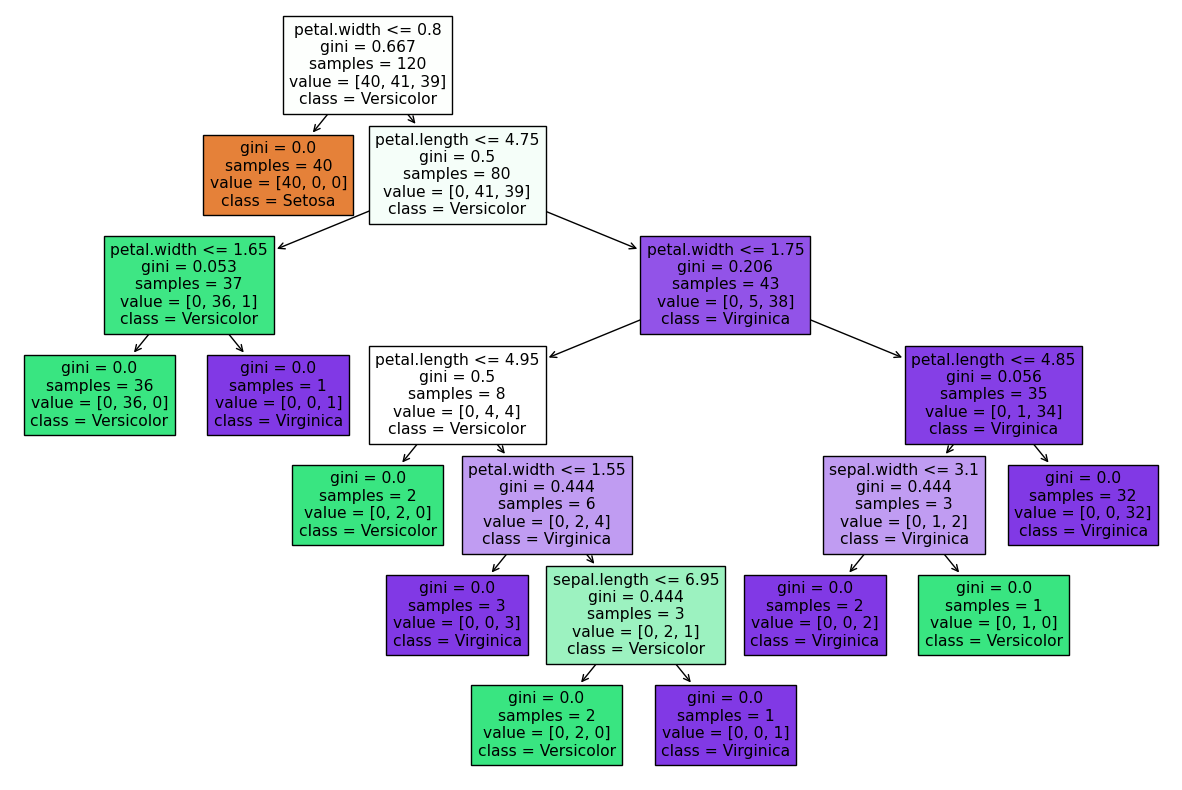

In [56]:
plt.figure(figsize=(15, 10))
tree.plot_tree(classifier, filled=True, feature_names=list(X.columns), class_names=['Setosa', 'Versicolor', 'Virginica'])
plt.show()
